Bài 1: 

Load dữ liệu dạng Series

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import statistics as st

In [3]:
data = pd.Series([421.0, 452.6, 456.1, 494.6, 373.8, 90.5, 110.7, 96.4, 81.7, 102.4, 241.0, 296.0, 317.0, 290.9, 256.5, 447.8, 687.6, 705.7, 879.0, 88.8,
296.0, 273.0, 268.0, 227.5, 279.3, 258.5, 296.0])

Biểu đồ proplot

((array([-1.95408825, -1.54243759, -1.29287772, -1.10504657, -0.94977721,
         -0.81458215, -0.69285972, -0.5806392 , -0.47530485, -0.37500632,
         -0.27835244, -0.18423656, -0.09172826,  0.        ,  0.09172826,
          0.18423656,  0.27835244,  0.37500632,  0.47530485,  0.5806392 ,
          0.69285972,  0.81458215,  0.94977721,  1.10504657,  1.29287772,
          1.54243759,  1.95408825]),
  array([ 81.7,  88.8,  90.5,  96.4, 102.4, 110.7, 227.5, 241. , 256.5,
         258.5, 268. , 273. , 279.3, 290.9, 296. , 296. , 296. , 317. ,
         373.8, 421. , 447.8, 452.6, 456.1, 494.6, 687.6, 705.7, 879. ])),
 (195.8445192235806, 325.49629629629624, 0.9449531980529471))

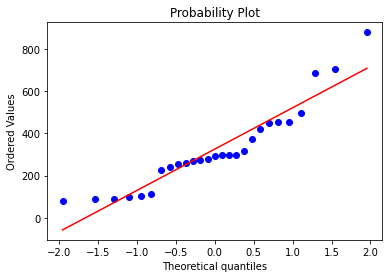

In [4]:
stats.probplot(data, plot=plt)

- Giải tích dữ liệu trên có phải lấy mẫu từ 1 tổng thể có phân phối chuẩn?

Những điểm màu xanh nằm tập trung trên đường thẳng màu đỏ nên ta có thể kết luận dữ liệu trên lấy mẫu từ 1 tổng thể có phân phối chuẩn.

- Kiểm tra giả thuyết trọng lượng trung bình là 300 gram với α = 0.05. Tính giá trị p−value.

Đây là bài toán kiểm định giả thuyết cho kỳ vọng có mẫu nhỏ n = 27 và phương sai chưa biết

Với giả thuyết H0: Trọng lượng trung bình là 300 gram (muy = muy0)
    
và đối thuyết H1: Trọng lượng trung bình khác 300 gram (muy != muy0)

Hàm kiểm định giả thuyết 1 mẫu cho TH mẫu nhỏ và phương sai chưa biết

In [5]:
def mean_hypothesis_testing(data, alpha = 0.05, muy = 300):
    mean = np.mean(data)
    n = len(data)
    st_dev = st.stdev(data)
    z = t.ppf(1 - (alpha), n - 1)
    print(z)
    T0 = (mean - muy)*(np.sqrt(n))/st_dev
    print("Observation Value: ", T0)
    if T0 > z:
        print("Bac bo gia thuyet H0")
    else:
        print("Chua du co so bac bo gia thuyet H0")
    return mean_hypothesis_testing 
print(mean_hypothesis_testing(data, alpha = 0.05, muy = 300))

1.7056179197592727
Observation Value:  0.6664601918592659
Chua du co so bac bo gia thuyet H0
<function mean_hypothesis_testing at 0x000002D8475740D0>


Tính giá trị p−value.

In [5]:
muy = 300
mean = np.mean(data)
n = len(data)
st_dev = st.stdev(data)
T0 = (mean - muy)*(np.sqrt(n))/st_dev
alpha = 0.05
df = n - 1
p_value = 2*(t.cdf(-abs(T0), df))
print("P-value: ", p_value)
if p_value <= alpha:
    print("Bac bo H0")
else:
    print("Chua du co so bac bo H0")

P-value:  0.510988070884212
Chua du co so bac bo H0


DataFrame cho dữ liệu trên với dòng là 4 nhân tố và cột với chỉ số 10 mẫu.

1: 20.5 28.1 27.8 27.0 28.0
25.2 25.3 27.1 20.5 31.3

2: 26.3 24.0 26.2 20.2 23.7
34.0 17.1 26.8 23.7 24.9

3: 29.5 34.0 27.5 29.4 27.9
26.2 29.9 29.5 30.0 35.6

4: 36.5 44.2 34.1 30.3 31.4
33.1 34.1 32.9 36.3 25.5

In [37]:
df = ({ 
'cot1': [20.5, 28.1, 27.8, 27.0, 28.0, 25.2, 25.3, 27.1, 20.5, 31.3],
'cot2': [26.3, 24.0, 26.2, 20.2, 23.7, 34.0, 17.1, 26.8, 23.7, 24.9],
'cot3': [29.5, 34.0, 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30.0, 35.6],
'cot4': [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]})
frame = pd.DataFrame(df)
print(frame)

   cot 1  cot 2  cot 3  cot 4
0   20.5   26.3   29.5   36.5
1   28.1   24.0   34.0   44.2
2   27.8   26.2   27.5   34.1
3   27.0   20.2   29.4   30.3
4   28.0   23.7   27.9   31.4
5   25.2   34.0   26.2   33.1
6   25.3   17.1   29.9   34.1
7   27.1   26.8   29.5   32.9
8   20.5   23.7   30.0   36.3
9   31.3   24.9   35.6   25.5


Thực hiện kiểm định F−test với mức ý nghĩa 0.01, sau đó lập bảng ANOVA tổng hợp kết quả trên.

In [149]:
s = {'a': [20.5, 28.1, 27.8, 27.0, 28.0,
            25.2, 25.3, 27.1, 20.5, 31.3],
     'b': [26.3, 24.0, 26.2, 20.2, 23.7,
            34.0, 17.1, 26.8, 23.7, 24.9],
     'c': [29.5, 34.0, 27.5, 29.4, 27.9,
            26.2, 29.9, 29.5, 30.0, 35.6],
     'd': [36.5, 44.2, 34.1, 30.3, 31.4,
            33.1, 34.1, 32.9, 36.3, 25.5]}
X =  np.array(pd.DataFrame(s).T)
X

array([[20.5, 28.1, 27.8, 27. , 28. , 25.2, 25.3, 27.1, 20.5, 31.3],
       [26.3, 24. , 26.2, 20.2, 23.7, 34. , 17.1, 26.8, 23.7, 24.9],
       [29.5, 34. , 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30. , 35.6],
       [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]])

In [150]:
a = 4
n = 10
sumX = np.sum(X) # Tổng tất cả phần tử của X
print('Tổng tất cả phần tử của X:', sumX)
meanX = np.mean(X) # Trung bình tất cả phần tử của X
print("Trung bình tất cả phần tử của X:", meanX)

Tổng tất cả phần tử của X: 1145.6000000000001
Trung bình tất cả phần tử của X: 28.640000000000004


In [151]:
SST = np.sum(X**2) - sumX**2/(a*n)
SST 

1072.2559999999867

In [152]:
SSTr = sum(np.sum(X, axis = 1)**2)/n - sumX**2/(a*n)
SSTr

509.12199999999575

In [153]:
SSE = SST - SSTr
SSE

563.1339999999909

In [154]:
MSTr = SSTr/(a-1) 
MSE = SSE/(a*(n-1)) 

f0 = MSTr/MSE 
print('f0 = ', f0) 

f0 =  10.849041258386187


In [155]:
def F_test(alpha: np.ndarray) -> tuple:
  f_test = f.ppf(alpha,a-1,a*(n-1)) 
  print('\nf_test = ', f_test) 
  if f0 > f_test: 
    print("\nBác bỏ H_0") 
  else:
    print("\nKhông đủ cơ sở bác bỏ H_0") 
F_test(0.01)


f_test =  0.0378184289845753

Bác bỏ H_0


Bảng ANOVA

In [156]:
table = {'Ten dai luong':['Treatment','Sai so','Tong'],
         'Tong binh phuong':[SSTr,SSE,SST],
         'Bac tu do':[a-1,a*(n-1),a*n-1],
         'Trung binh binh phuong':[MSTr,MSE,None],
         'F0':[f0,None,None]} 
table = pd.DataFrame(table) 
print('\nTable ANOVA:\n', table)


Table ANOVA:
   Ten dai luong  Tong binh phuong  Bac tu do  Trung binh binh phuong  \
0     Treatment           509.122          3              169.707333   
1        Sai so           563.134         36               15.642611   
2          Tong          1072.256         39                     NaN   

          F0  
0  10.849041  
1        NaN  
2        NaN  


Bài 3

Load dataset dưới dạng Dataframe

In [9]:
path = 'COVID-19.xlsx'
data = pd.read_excel(path)
data1 = pd.DataFrame(data)
print(data1)

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0     2020-06-29   29      6  2020    351      18             Afghanistan   
1     2020-06-28   28      6  2020    165      20             Afghanistan   
2     2020-06-27   27      6  2020    276       8             Afghanistan   
3     2020-06-26   26      6  2020    460      36             Afghanistan   
4     2020-06-25   25      6  2020    234      21             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
26557 2020-03-25   25      3  2020      0       0                Zimbabwe   
26558 2020-03-24   24      3  2020      0       1                Zimbabwe   
26559 2020-03-23   23      3  2020      0       0                Zimbabwe   
26560 2020-03-22   22      3  2020      1       0                Zimbabwe   
26561 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  
0        AF   

Trích phần dữ liệu liên quan tới Afghanistan.

In [112]:
Afghanistan = data1[data1.countriesAndTerritories == 'Afghanistan']
Afghanistan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
167,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
168,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
169,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
170,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia


Vẽ biểu đồ mô tả số ca tử vong như 1 chuỗi thời gian.

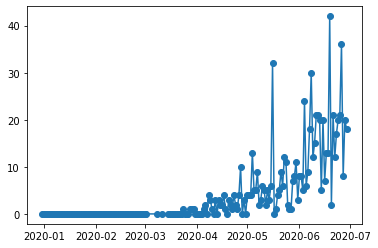

In [128]:
DMY = Afghanistan['dateRep']
Death = Afghanistan['deaths']
plt.plot_date(DMY, Death, linestyle='solid')

Tính các tham số mô tả thống kê như: trung bình, phương sai, độ lệch chuẩn, min, max, trung vị, mod, các phân vị.

In [115]:
AFG = Afghanistan.deaths
print("Mean:\n ", AFG.mean())

Mean:
  4.191860465116279


In [116]:
print("Variance:\n ", AFG.var())

Variance:
  55.606249150006995


In [117]:
print("Standard:\n ", AFG.std())

Standard:
  7.456959779293904


In [118]:
print("Max:\n ", AFG.max())

Max:
  42


In [119]:
print("Min:\n ", AFG.min())

Min:
  0


In [120]:
print("Median:\n ", AFG.median())

Median:
  0.0


In [134]:
print("Q1: ", AFG.quantile(0.25))
print("Q2: ", AFG.quantile(0.5))
print("Q3: ", AFG.quantile(0.75))

Q1:  0.0
Q2:  0.0
Q3:  5.0


In [122]:
print("Mod:\n", AFG.mode())

Mod:
 0    0
dtype: int64


Xoá cột “countryterritoryCode”.

In [19]:
dele_colum = data1.drop('countryterritoryCode', axis = 1)
dele_colum

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14645473.0,Africa


Xoá hết các dòng liên quan tới Viet Nam ở Dataframe ban đầu.

In [130]:
dele_row = data1.drop(data1[data1.countriesAndTerritories == 'Afghanistan'].index)
dele_row

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
172,2020-06-29,29,6,2020,72,2,Albania,AL,ALB,2862427.0,Europe
173,2020-06-28,28,6,2020,61,2,Albania,AL,ALB,2862427.0,Europe
174,2020-06-27,27,6,2020,77,2,Albania,AL,ALB,2862427.0,Europe
175,2020-06-26,26,6,2020,78,2,Albania,AL,ALB,2862427.0,Europe
176,2020-06-25,25,6,2020,67,2,Albania,AL,ALB,2862427.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


Lọc ra những quốc gia có số dân trên 2.5 triệu người và số ca mắc trên 3000 người.

In [21]:
QG = data1[(data1.popData2019 > 250000) & (data1.cases > 3000)]
QG

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
868,2020-06-28,28,6,2020,5287,40,Argentina,AR,ARG,44780675.0,America
871,2020-06-25,25,6,2020,4920,36,Argentina,AR,ARG,44780675.0,America
876,2020-06-20,20,6,2020,4018,50,Argentina,AR,ARG,44780675.0,America
2078,2020-06-29,29,6,2020,3809,43,Bangladesh,BD,BGD,163046173.0,Asia
2079,2020-06-28,28,6,2020,3504,34,Bangladesh,BD,BGD,163046173.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
25533,2020-03-24,24,3,2020,11236,119,United_States_of_America,US,USA,329064917.0,America
25534,2020-03-23,23,3,2020,8459,131,United_States_of_America,US,USA,329064917.0,America
25535,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,USA,329064917.0,America
25536,2020-03-21,21,3,2020,5374,110,United_States_of_America,US,USA,329064917.0,America


Hãy lọc số liệu tại dòng thứ 50 cột thứ 3 của phần dữ liệu Afghanistan.

In [142]:
Afghanistan.loc[50]['year']

2020

Xoá 3 dòng đầu của dữ liệu Belarus.

In [22]:
Belarus = data1[data1.countriesAndTerritories == 'Belarus']
Belarus

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2289,2020-06-29,29,6,2020,380,6,Belarus,BY,BLR,9452409.0,Europe
2290,2020-06-28,28,6,2020,382,4,Belarus,BY,BLR,9452409.0,Europe
2291,2020-06-27,27,6,2020,331,6,Belarus,BY,BLR,9452409.0,Europe
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe


In [23]:
del_row_BLR = Belarus.iloc[3:]
del_row_BLR

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
2294,2020-06-24,24,6,2020,464,6,Belarus,BY,BLR,9452409.0,Europe
2295,2020-06-23,23,6,2020,518,5,Belarus,BY,BLR,9452409.0,Europe
2296,2020-06-22,22,6,2020,569,3,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe


In [146]:
Belarus = data1[data1.countriesAndTerritories == 'Belarus'][3:]
Belarus

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
2294,2020-06-24,24,6,2020,464,6,Belarus,BY,BLR,9452409.0,Europe
2295,2020-06-23,23,6,2020,518,5,Belarus,BY,BLR,9452409.0,Europe
2296,2020-06-22,22,6,2020,569,3,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
